In [1]:
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Ray bundle:

Polar coordinates ray bundle
* radius 12.5m
* 5 rays accros the radius
* 8 rays on the azimuths

In [2]:
D = 26
nPx = 501
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])

In [20]:
tid = ceo.StopWatch()

In [22]:
gmt = ceo.GMT_MX(D,nPx)
src.reset()
tid.tic()
gmt.propagate(src)
tid.toc()
print tid.elapsedTime
wfe = src.phase.host(units='nm')

47.3219184875


### Aperture

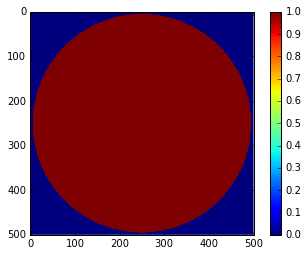

In [4]:
src.reset()
A = ceo.Aperture(25.5,0.0,nPx)
A.vignetting(src)
P = src.rays.vignetting.host().T
imshow(np.reshape(P,(nPx,nPx)),interpolation='none')
colorbar()

### M1

GMT M1 definition:
* curvature radius: 36m
* conic constant: 1-0.9982857

In [5]:
M1 = ceo.Conic(1.0/36.0,1-0.9982857,refractive_index=-1)

### M2

GMT M1 definition:
* curvature radius: 4.1639009m
* conic constant: 1-0.71692784

In [6]:
M2 = ceo.Conic(-1.0/4.1639009,1-0.71692784,
               origin=[0.0,0.0,20.26247614],refractive_index=-1)

### Reflection from M1 and M2

In [23]:
src.reset()
A.vignetting(src)
tid.tic()
ceo.Trace(src,[M1,M2])
src.rays.to_sphere(focal_plane_distance=-5.830,
                   focal_plane_radius=2.197173)
tid.toc()
print tid.elapsedTime


61.3604812622


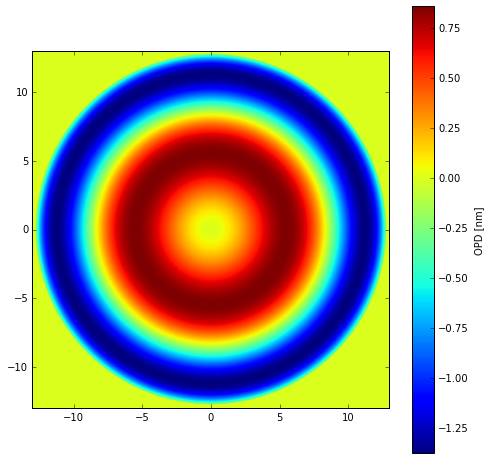

In [13]:
opd = src.rays.optical_path_difference.host(units='nm').reshape(nPx,nPx)
from matplotlib import cm
fig = plt.figure(figsize=(8,8))
ext = (-D/2,D/2,-D/2,D/2)
ax = imshow(opd*np.reshape(P,(nPx,nPx)),extent=ext)
h = fig.colorbar(ax)
h.set_label('OPD [nm]')

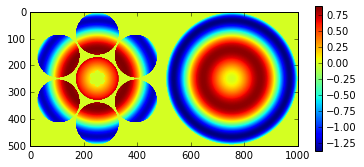

In [18]:
src.opd2phase()
imshow(np.concatenate((wfe,opd*np.reshape(P,(nPx,nPx))),axis=1))
colorbar(shrink=0.65)